In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [5]:
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

In [6]:
sample_indices = np.random.choice(len(X), 5000, replace=False)
X = X[sample_indices]
y = y[sample_indices]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data shapes:", X_train.shape, X_test.shape)
print("Class distribution:", np.bincount(y))

Data shapes: (4000, 784) (1000, 784)
Class distribution: [496 557 500 484 441 451 490 537 504 540]


In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_train)

In [10]:
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

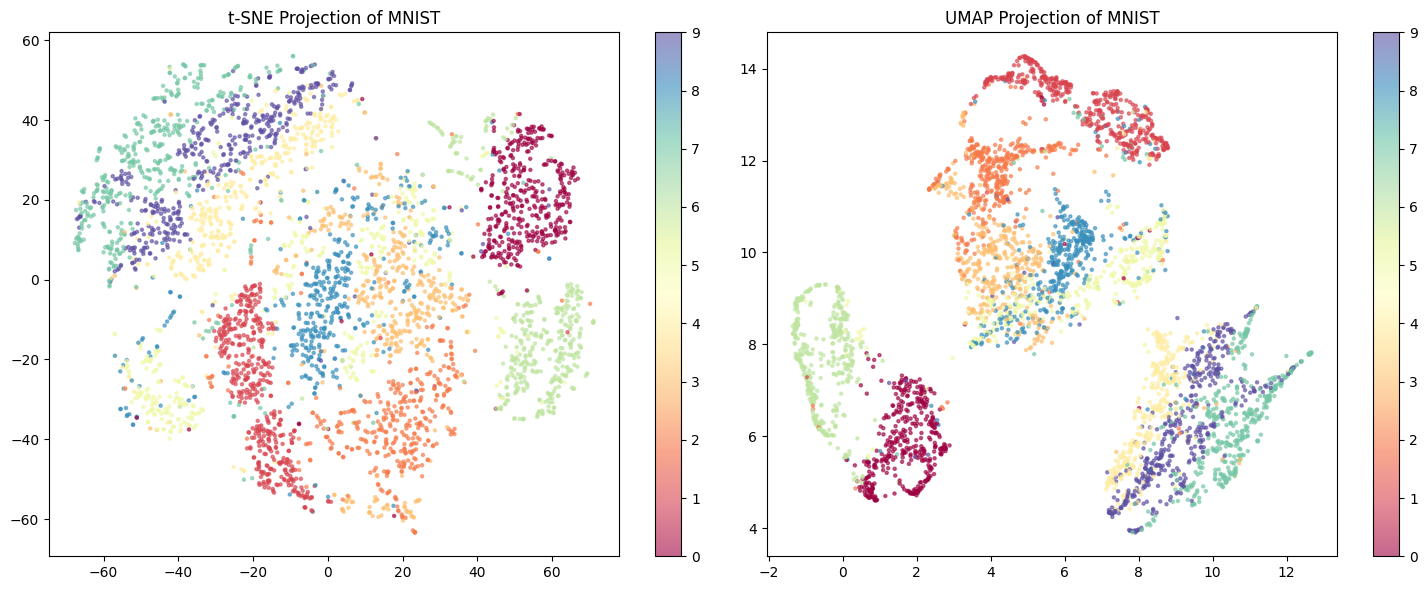

In [13]:
# Plot 2D projections
plt.figure(figsize=(15, 6))

plt.subplot(121)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,
                      cmap='Spectral', s=5, alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Projection of MNIST')

plt.subplot(122)
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y_train,
                      cmap='Spectral', s=5, alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('UMAP Projection of MNIST')

plt.tight_layout()
plt.savefig('mnist_visualization.png', dpi=300)
plt.show()

In [15]:
umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_train)

fig = px.scatter_3d(
    x=X_umap_3d[:, 0], y=X_umap_3d[:, 1], z=X_umap_3d[:, 2],
    color=y_train,
    color_continuous_scale='rainbow',
    title='3D UMAP Projection of MNIST',
    labels={'color': 'Digit Class'},
    height=700,
    opacity=0.7
)
fig.update_layout(coloraxis_colorbar=dict(tickvals=list(range(10))))
fig.update_traces(marker=dict(size=3))
fig.write_html('mnist_3d_umap.html')
fig.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
model = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    early_stopping_rounds=20,
    use_label_encoder=False
)


In [17]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:07:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        92
           1       0.95      0.98      0.97       114
           2       0.92      0.93      0.92       104
           3       0.97      0.97      0.97        88
           4       0.97      0.95      0.96       104
           5       0.95      0.94      0.94        80
           6       0.93      0.92      0.93       103
           7       0.95      0.88      0.92       113
           8       0.96      0.91      0.93        94
           9       0.88      0.94      0.91       108

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [20]:
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Overall Accuracy: 0.9380


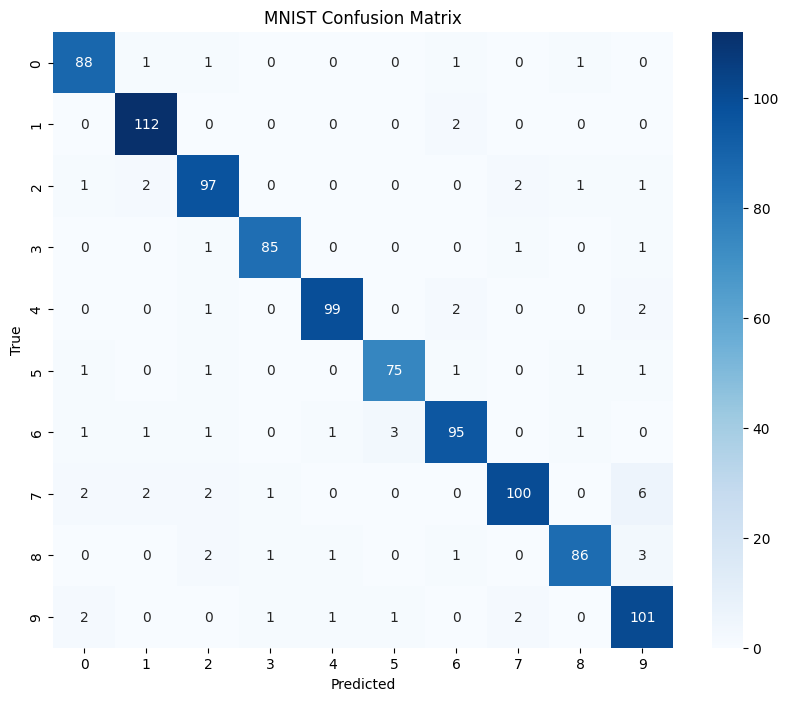

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MNIST Confusion Matrix')
plt.savefig('mnist_confusion_matrix.png', dpi=300)
plt.show()


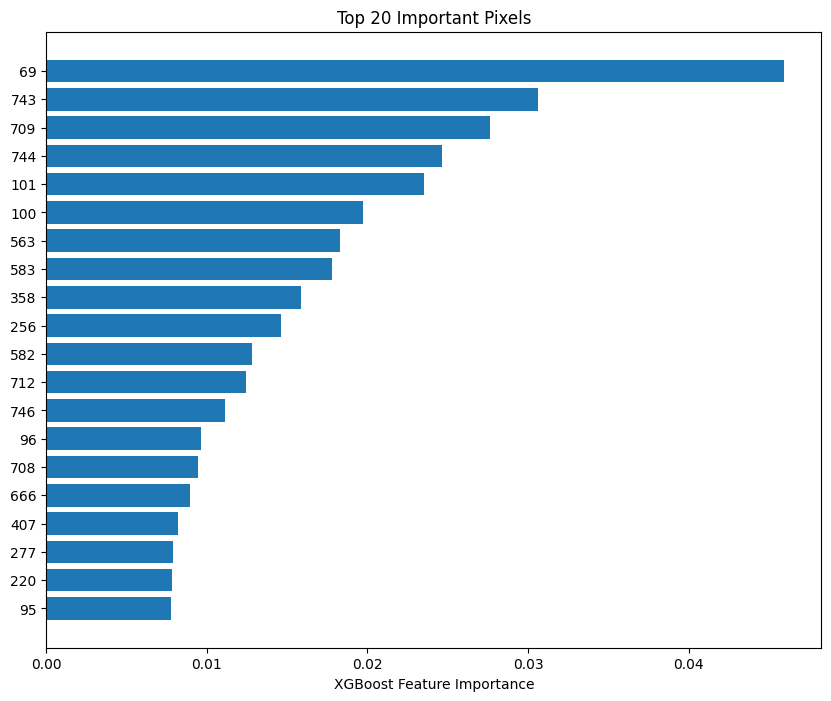

In [22]:
plt.figure(figsize=(10, 8))
sorted_idx = model.feature_importances_.argsort()
plt.barh(np.array(range(20)), model.feature_importances_[sorted_idx][-20:])
plt.yticks(range(20), sorted_idx[-20:])
plt.xlabel("XGBoost Feature Importance")
plt.title('Top 20 Important Pixels')
plt.savefig('feature_importance.png', dpi=300)
plt.show()

In [23]:
misclassified = np.where(y_pred != y_test)[0]
sample_indices = np.random.choice(misclassified, 9, replace=False)

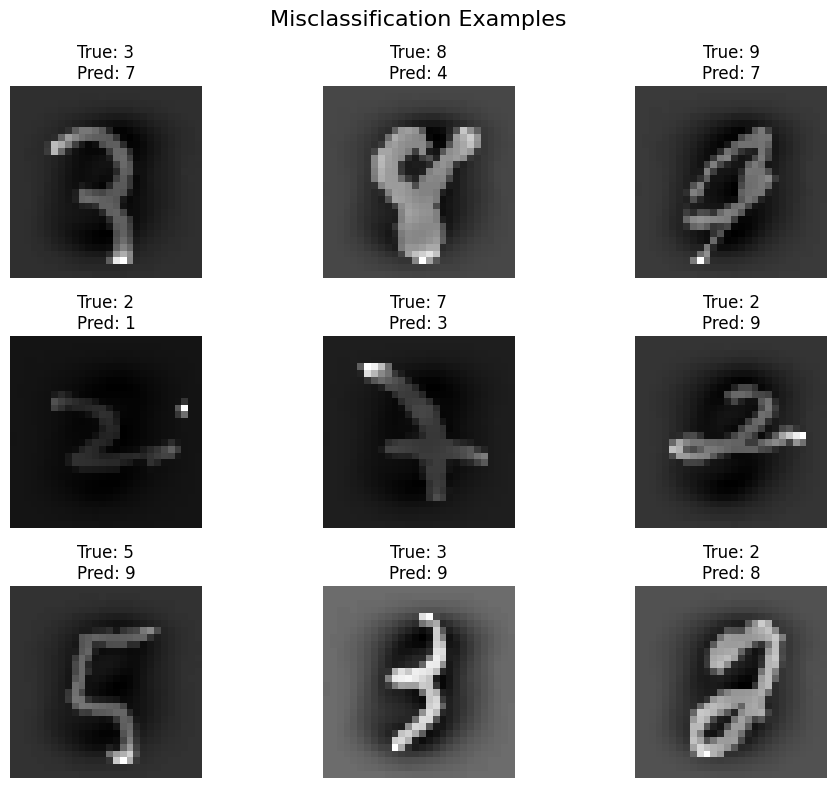

In [24]:
plt.figure(figsize=(10, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle('Misclassification Examples', fontsize=16)
plt.tight_layout()
plt.savefig('misclassified_examples.png', dpi=300)
plt.show()